In [1]:
import random

from segment_anything import build_sam_vit_b, SamAutomaticMaskGenerator
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
model     = build_sam_vit_b(checkpoint = 'checkpoint/sam_vit_b.pth').to(device)
image     = cv2.imread('checkpoint/src_image.jpg')
image     = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

/opt/conda/envs/torch/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [4]:
%%time
generator = SamAutomaticMaskGenerator(model)
masks     = generator.generate(image)

CPU times: user 2.26 s, sys: 747 ms, total: 3 s
Wall time: 3.02 s


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 479.5, 333.5, -0.5)

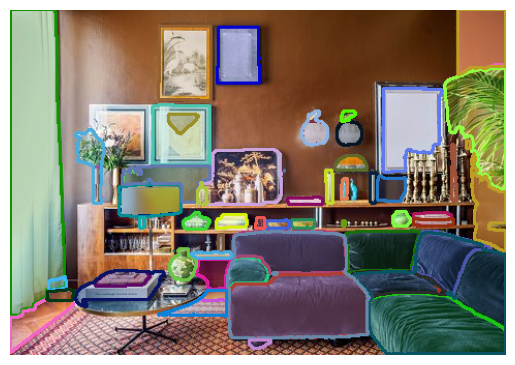

In [5]:
image_cp = image.copy()

for mask in masks:
    
    segmentation  = mask['segmentation']
    segmentation  = segmentation + np.zeros(segmentation.shape, np.uint8)
    _, bin_image  = cv2.threshold(segmentation, 0, 127, cv2.THRESH_BINARY)

    color         = (random.randint(0, 256), random.randint(0, 256), random.randint(0, 256))
    masked_image  = np.where(segmentation[..., None], color, image_cp)
    image_cp      = cv2.addWeighted(image_cp, 0.8, masked_image, 0.2, 0, dtype = cv2.CV_32F)
    
    conts, _ = cv2.findContours(bin_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    for cont in conts: cv2.drawContours(image_cp, [cont], -1, color, 2)
        
plt.imshow(image_cp.astype(np.uint32))
plt.axis(False)